# MUSIC POPULARITY PREDICTION

Music popularity prediction involves building machine learning models to estimate the popularity of tracks based on their audio features. Accurately predicting music popularity can assist streaming platforms in better understanding user preferences, optimizing playlists, and enhancing recommendation systems, ultimately boosting user engagement and satisfaction.

## Music Popularity Prediction: 

### Overview:

Music popularity prediction means using regression techniques to forecast the popularity of songs based on various music features and metadata. Expected results include accurate predictions of a song’s future performance in terms of streams, downloads, and chart positions, which enable music producers, artists, and marketers to make informed decisions.

### Importing Dataset and Python liraries: 

In [6]:
import pandas as pd

spotify_data = pd.read_csv("Spotify_data.csv")

print(spotify_data.head())

   Unnamed: 0                  Track Name  \
0           0                 Not Like Us   
1           1                     Houdini   
2           2  BAND4BAND (feat. Lil Baby)   
3           3          I Don't Wanna Wait   
4           4                       Pedro   

                                   Artists                  Album Name  \
0                           Kendrick Lamar                 Not Like Us   
1                                   Eminem                     Houdini   
2                    Central Cee, Lil Baby  BAND4BAND (feat. Lil Baby)   
3                David Guetta, OneRepublic          I Don't Wanna Wait   
4  Jaxomy, Agatino Romero, Raffaella Carrà                       Pedro   

                 Album ID                Track ID  Popularity Release Date  \
0  5JjnoGJyOxfSZUZtk2rRwZ  6AI3ezQ4o3HUoP6Dhudph3          96   2024-05-04   
1  6Xuu2z00jxRPZei4IJ9neK  2HYFX63wP3otVIvopRS99Z          94   2024-05-31   
2  4AzPr5SUpNF553eC1d3aRy  7iabz12vAuVQYyekFIWJxD 

In [7]:
spotify_data.drop(columns=['Unnamed: 0'], inplace=True)

In [8]:
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track Name        227 non-null    object 
 1   Artists           227 non-null    object 
 2   Album Name        227 non-null    object 
 3   Album ID          227 non-null    object 
 4   Track ID          227 non-null    object 
 5   Popularity        227 non-null    int64  
 6   Release Date      227 non-null    object 
 7   Duration (ms)     227 non-null    int64  
 8   Explicit          227 non-null    bool   
 9   External URLs     227 non-null    object 
 10  Danceability      227 non-null    float64
 11  Energy            227 non-null    float64
 12  Key               227 non-null    int64  
 13  Loudness          227 non-null    float64
 14  Mode              227 non-null    int64  
 15  Speechiness       227 non-null    float64
 16  Acousticness      227 non-null    float64
 1

In [9]:
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track Name        227 non-null    object 
 1   Artists           227 non-null    object 
 2   Album Name        227 non-null    object 
 3   Album ID          227 non-null    object 
 4   Track ID          227 non-null    object 
 5   Popularity        227 non-null    int64  
 6   Release Date      227 non-null    object 
 7   Duration (ms)     227 non-null    int64  
 8   Explicit          227 non-null    bool   
 9   External URLs     227 non-null    object 
 10  Danceability      227 non-null    float64
 11  Energy            227 non-null    float64
 12  Key               227 non-null    int64  
 13  Loudness          227 non-null    float64
 14  Mode              227 non-null    int64  
 15  Speechiness       227 non-null    float64
 16  Acousticness      227 non-null    float64
 1

#### Since popularity is the target variable, let's perform exploratory data analysis (EDA) to examine the relationship between each music feature and popularity.

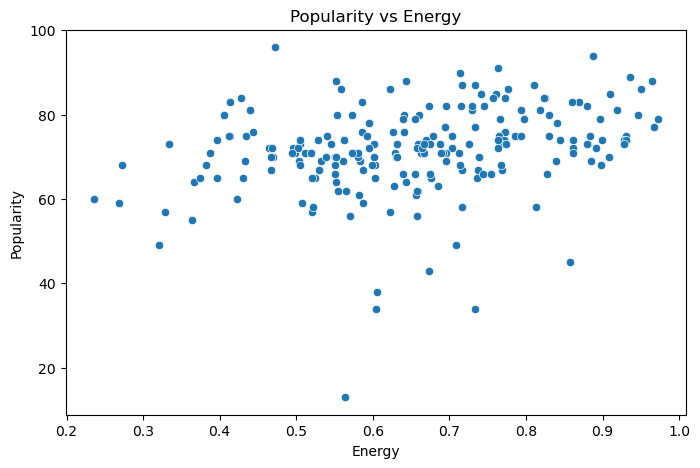

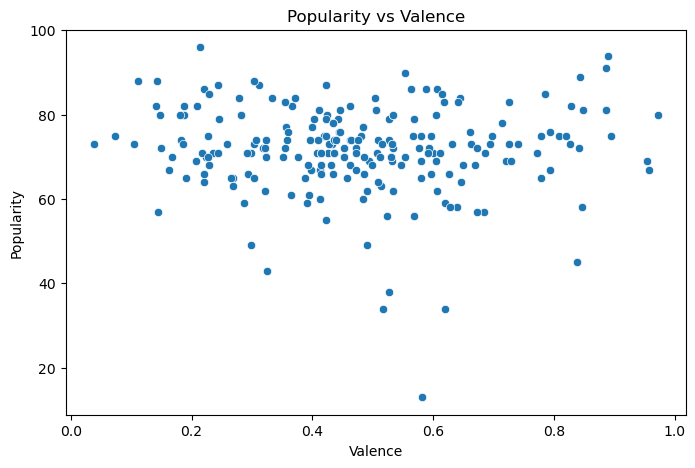

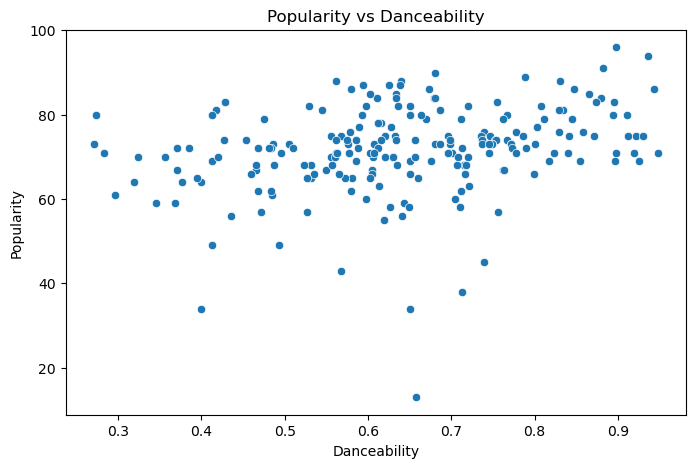

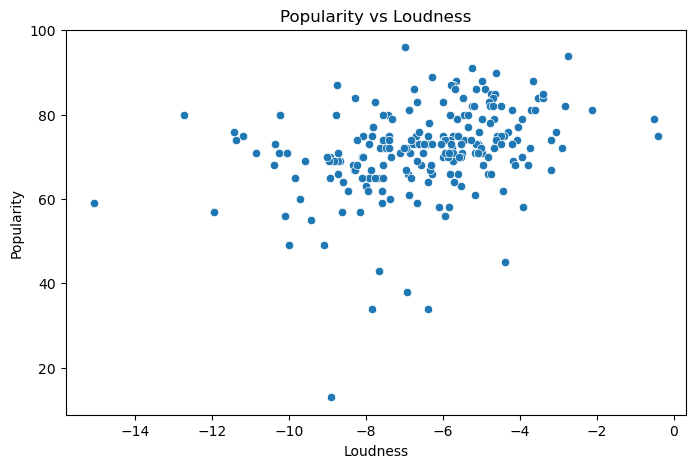

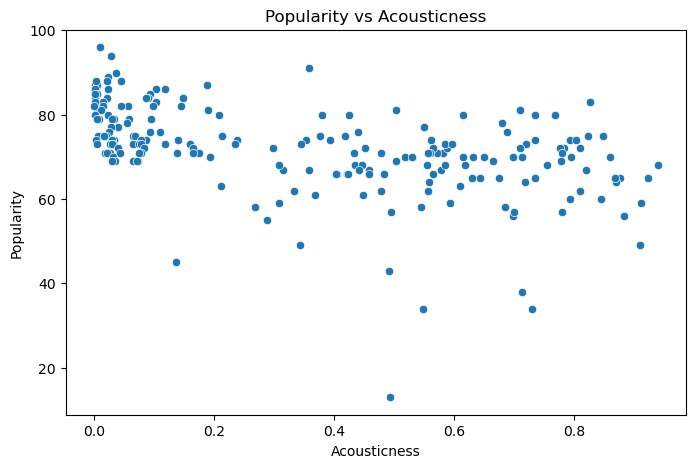

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
features = ['Energy', 'Valence', 'Danceability', 'Loudness', 'Acousticness']
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=spotify_data, x=feature, y='Popularity')
    plt.title(f'Popularity vs {feature}')
    plt.show()

From these visualizations, we can observe a positive correlation between higher energy levels and danceability with higher popularity scores. Conversely, higher acousticness and lower loudness levels tend to correspond with lower popularity, suggesting that more energetic and less acoustic tracks are generally favored. Valence, however, shows a weaker and less distinct relationship with popularity, indicating that the emotional positivity of a track alone is not a strong predictor of its popularity.

### Correlation between all the features:

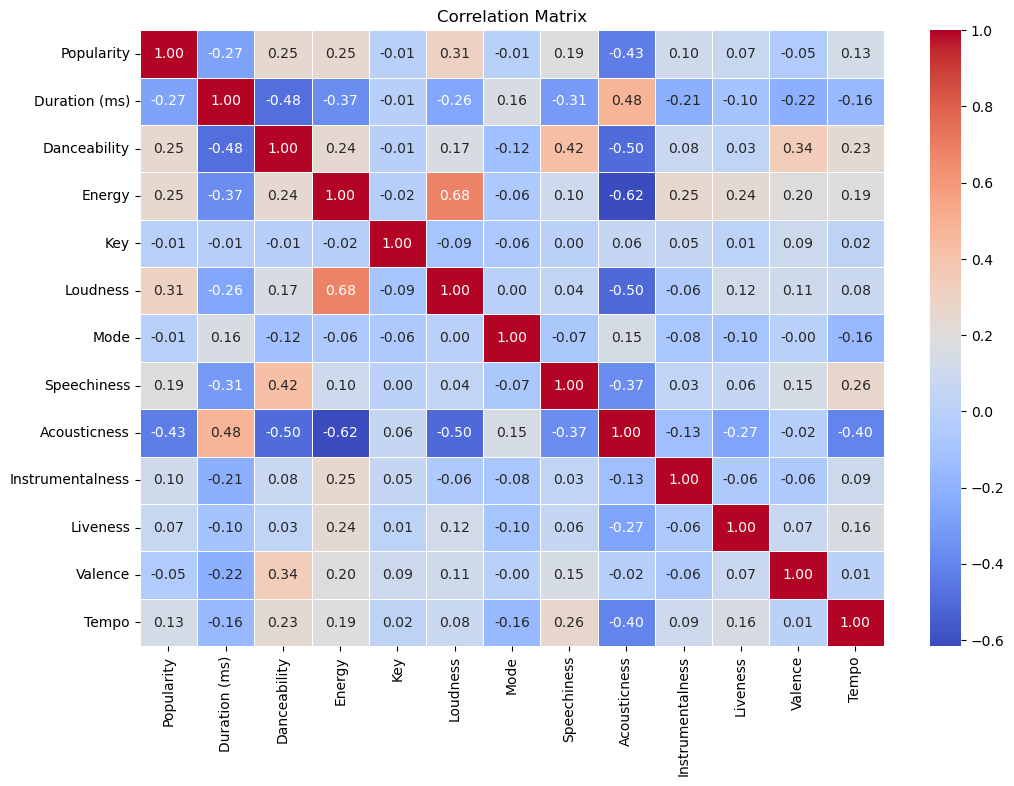

In [11]:
numeric_columns = spotify_data.select_dtypes(include=['float64', 'int64']).columns
numeric_data = spotify_data[numeric_columns]

corr_matrix = numeric_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

As we can see from the above correlation matrix, popularity has a moderate positive correlation with loudness (0.31) and danceability (0.25), indicating that louder and more danceable tracks tend to be more popular. There is a moderate negative correlation between popularity and acousticness (-0.43), suggesting that tracks with higher acousticness are generally less popular. Energy also has a positive correlation with popularity (0.25).

### Distribution of all the music features:

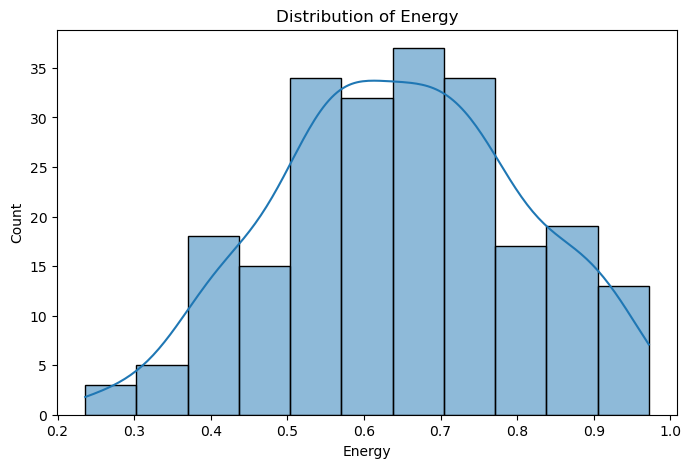

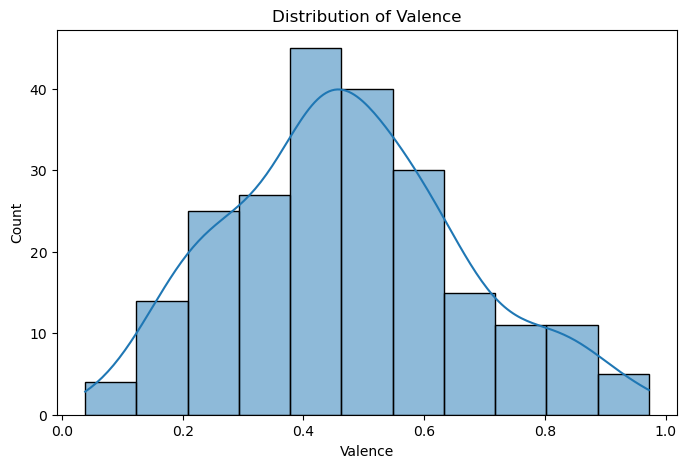

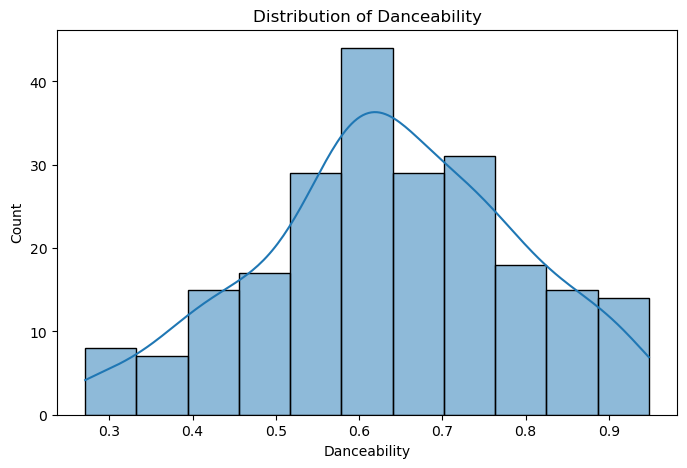

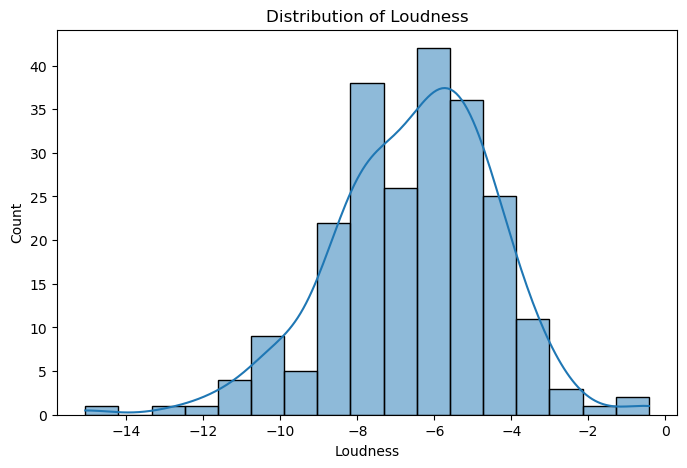

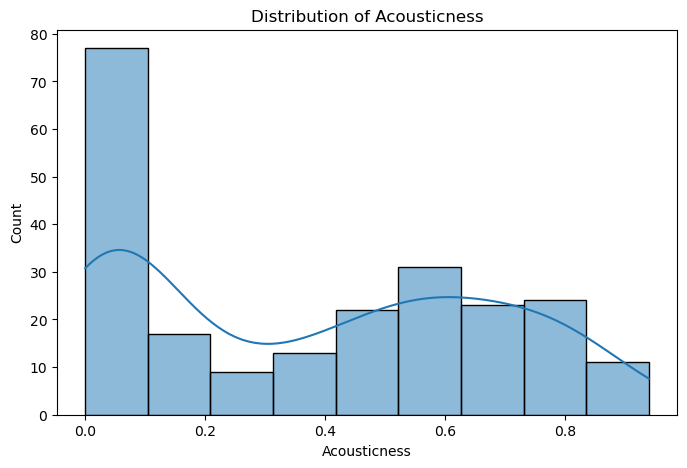

In [12]:
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.histplot(spotify_data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

The distribution of energy is roughly bell-shaped, indicating a balanced range of energy levels in the tracks. Valence and danceability exhibit a similar pattern, with most tracks having mid-range values, suggesting a well-rounded mix of emotionally positive and danceable tracks. Loudness follows a near-normal distribution centered around -6 dB, reflecting typical volume levels in the dataset. In contrast, acousticness is skewed towards lower values, indicating that most tracks are not highly acoustic.

## Feature Selection and Model Training

Based on the correlation analysis and visualizations, the following features show a significant relationship with popularity and can be used to train a music popularity prediction model:
<li>Energy</li>
<li>Valence</li>
<li>Danceability</li>
<li>Loudness</li>
<li>Acousticness</li>
<li>Tempo</li>
<li>Speechiness</li>
<li>Liveness</li>
<br>
These features capture various audio characteristics that influence the popularity of music tracks.
<br><br>
Now, it's time to train a Machine Learning model to predict the popularity of music using the features we have selected. Let’s split and scale the data and then train the model using the random forest regression algorithm:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# select the features and target variable
features = ['Energy', 'Valence', 'Danceability', 'Loudness', 'Acousticness', 'Tempo', 'Speechiness', 'Liveness']
X = spotify_data[features]
y = spotify_data['Popularity']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, refit=True, verbose=2, cv=5)

grid_search_rf.fit(X_train_scaled, y_train)

best_params_rf = grid_search_rf.best_params_

best_rf_model = grid_search_rf.best_estimator_

y_pred_best_rf = best_rf_model.predict(X_test_scaled)

<storng><em>Here, the random forest algorithm is selected as this algorithm resulted in better performance in comparision to the other algorithms after hyperparameter tuning.</em></strong>

<strong>Let’s have a look at the actual vs predicted results of the test data:</strong>

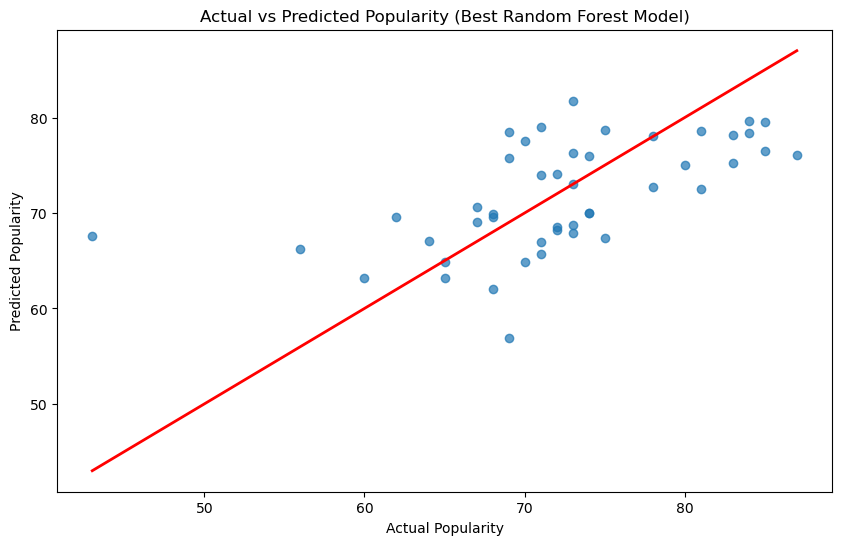

In [16]:
# make predictions
y_pred_best_rf = best_rf_model.predict(X_test_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best_rf, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('Actual vs Predicted Popularity (Best Random Forest Model)')
plt.show()


The red line represents perfect predictions, where the predicted popularity exactly matches the actual popularity. Most points are clustered near this line, indicating that the model is making fairly accurate predictions. However, there are noticeable deviations, especially at lower popularity values, highlighting areas where the model's predictions are less accurate.

## Conclusion:

This is how we can train a Machine Learning model for the task of <strong>Music popularity prediction with Python</strong>. Predicting the popularity of music can help music streaming platforms understand user preferences, optimize playlists and enhance recommendation systems to improve user engagement and satisfaction.